In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json
from IPython.display import display


#country count
output_file = os.path.join("output_data", "country_player_count.csv")


In [2]:
# get joined_yearmonth dataframe for player details file
def get_chessplayer_details_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    joined_months = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_month = time.strftime('%m', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
            joined_months.append(joined_month)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_month"] = joined_months
    chessplayers_df["joined_date"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m-%d")
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [3]:
# pass country code
def get_status_summary(country):
    output_data_players = f"output_data/players_{country}.csv"
    
    chessplayers_sample_df = get_chessplayer_details_dataframe(f"output_data/player_details_{country}.csv")
    
    # group grouped_status_chessplayers_IN_df by status
    grouped_status_chessplayers_sample_df = chessplayers_sample_df.groupby(["status"])
    count_sample = chessplayers_sample_df["player_index"].count()
    print(f"Recent user count (sample) {country} {count_sample}")

    # read csv to count users (total population) of players in IN
    chessplayers_population_df = pd.read_csv(output_data_players)
    count_players_population = chessplayers_population_df["player_index"].count()
    print(f"Recent user count (population) {country} {count_players_population}")

    # count statuses
    count_status = grouped_status_chessplayers_sample_df["status"].count()
    percent_sample_status = grouped_status_chessplayers_sample_df["status"].count() / count_sample
    estimated_population_status = percent_sample_status * count_players_population

    # Assemble the resulting series into a single summary dataframe.
    summary_status_df = pd.DataFrame(
        {"Status": count_status,  
         "Percent (of sample)": percent_sample_status,
         "Estimated Premium Count of Population": round(estimated_population_status,0)
        })
    return summary_status_df

In [4]:
# Get top player count 
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              
        if row["Country"] == "United Kingdom of Great Britain and Northern Ireland":            
            country_name.append("Great Britain")
        elif row["Country"] == "Russian Federation":
            country_name.append("Russia")            
        else:
            country_name.append(row["Country"])
        country_codes.append(row["Code"])
        player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]

count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)

top_10_df = count_sorted_cleaned.head(10)
top_10_df


,Country,Country Code,Player Count
0,India,IN,276922
1,Great Britain,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
5,Germany,DE,117887
6,Italy,IT,117604
7,Spain,ES,112180
8,Poland,PL,108111
9,Russia,RU,103656


In [5]:
# define lists 
summary_dataframes = []
percent_samples = []
est_population_premiums = []
count_populations = []
countries = []
country_codes = []

i = 0
for country_code in top_10_df["Country Code"]:  
    country_name = top_10_df["Country"][i]
    print(f"Generating status summary for {country_name} ({country_code})")
    summary_status_df = get_status_summary(country_code)
    countries.append(country_name)    
    count_populations.append(top_10_df["Player Count"][i])
    country_codes.append(country_code)    
    
    percent_sample = summary_status_df["Percent (of sample)"]["premium"]
    est_population_premium = summary_status_df["Estimated Premium Count of Population"]["premium"]
    
    percent_samples.append(percent_sample)
    est_population_premiums.append(est_population_premium)
    
    summary_dataframes.append(summary_status_df)
    i += 1
    print("\n")

Generating status summary for India (IN)
Recent user count (sample) IN 4996
Recent user count (population) IN 276922


Generating status summary for Great Britain (GB)
Recent user count (sample) GB 4995
Recent user count (population) GB 192118


Generating status summary for France (FR)
Recent user count (sample) FR 4996
Recent user count (population) FR 176560


Generating status summary for Brazil (BR)
Recent user count (sample) BR 4992
Recent user count (population) BR 147040


Generating status summary for Canada (CA)
Recent user count (sample) CA 4996
Recent user count (population) CA 134687


Generating status summary for Germany (DE)
Recent user count (sample) DE 4995
Recent user count (population) DE 117887


Generating status summary for Italy (IT)
Recent user count (sample) IT 4999
Recent user count (population) IT 117604


Generating status summary for Spain (ES)
Recent user count (sample) ES 4996
Recent user count (population) ES 112180


Generating status summary for Polan

In [6]:
# display status summary dataframe for each country
j = 0
for country_df in summary_dataframes:       
    print("\n\n")
    print("--------------------------------------------------------------------")
    print(f"Statuses for {countries[j]} ({country_codes[j]})")    
    print("--------------------------------------------------------------------")
    display(country_df)    
    j += 1
    
    




--------------------------------------------------------------------
Statuses for India (IN)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4776,0.955965,264728.0
closed,3,0.000600,166.0
closed:abuse,2,0.000400,111.0
closed:fair_play_violations,3,0.000600,166.0
premium,212,0.042434,11751.0





--------------------------------------------------------------------
Statuses for Great Britain (GB)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4079,0.816617,156887.0
closed,5,0.001001,192.0
closed:abuse,1,0.000200,38.0
closed:fair_play_violations,1,0.000200,38.0
premium,909,0.181982,34962.0





--------------------------------------------------------------------
Statuses for France (FR)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4175,0.835669,147546.0
closed,7,0.001401,247.0
closed:fair_play_violations,5,0.001001,177.0
premium,809,0.161930,28590.0





--------------------------------------------------------------------
Statuses for Brazil (BR)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4572,0.915865,134669.0
closed,3,0.000601,88.0
closed:abuse,2,0.000401,59.0
closed:fair_play_violations,4,0.000801,118.0
premium,411,0.082332,12106.0





--------------------------------------------------------------------
Statuses for Canada (CA)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4095,0.819656,110397.0
closed,1,0.000200,27.0
closed:abuse,1,0.000200,27.0
closed:fair_play_violations,1,0.000200,27.0
premium,898,0.179744,24209.0





--------------------------------------------------------------------
Statuses for Germany (DE)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4310,0.862863,101720.0
closed,4,0.000801,94.0
closed:fair_play_violations,5,0.001001,118.0
premium,676,0.135335,15954.0





--------------------------------------------------------------------
Statuses for Italy (IT)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4571,0.914383,107535.0
closed,3,0.000600,71.0
closed:abuse,1,0.000200,24.0
closed:fair_play_violations,1,0.000200,24.0
premium,423,0.084617,9951.0





--------------------------------------------------------------------
Statuses for Spain (ES)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4542,0.909127,101986.0
closed,1,0.000200,22.0
closed:abuse,1,0.000200,22.0
closed:fair_play_violations,3,0.000600,67.0
premium,449,0.089872,10082.0





--------------------------------------------------------------------
Statuses for Poland (PL)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4467,0.894294,96683.0
closed,7,0.001401,152.0
closed:abuse,1,0.000200,22.0
closed:fair_play_violations,6,0.001201,130.0
premium,514,0.102903,11125.0





--------------------------------------------------------------------
Statuses for Russia (RU)
--------------------------------------------------------------------


,Status,Percent (of sample),Estimated Premium Count of Population
status,,,
basic,4463,0.892957,92560.0
closed,4,0.000800,83.0
closed:abuse,6,0.001200,124.0
premium,524,0.104842,10867.0
staff,1,0.000200,21.0


In [7]:
# percent samples list for each country in 10 ten
percent_samples

[0.04243394715772618,
 0.18198198198198198,
 0.1619295436349079,
 0.08233173076923077,
 0.17974379503602883,
 0.13533533533533534,
 0.08461692338467694,
 0.08987189751801442,
 0.10290290290290291,
 0.10484193677470989]

In [8]:
# estimated population premium user count based on percent in samples and user count total population
est_population_premiums

[11751.0,
 34962.0,
 28590.0,
 12106.0,
 24209.0,
 15954.0,
 9951.0,
 10082.0,
 11125.0,
 10867.0]

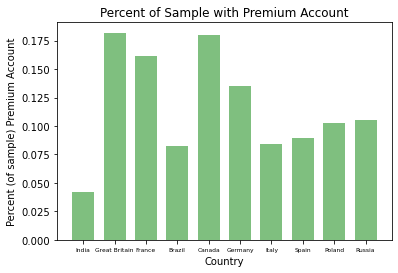

In [9]:
# Generate a bar plot showing percent of sample that have premium accounts
x_axis = np.arange(len(countries))

# Create the ticks for our bar chart's x axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries,rotation=0,fontsize=6)

plt.bar(x_axis,percent_samples, color='g', alpha=0.5, align="center", width=.7)
# Give the chart a title, x label, and y label
plt.title("Percent of Sample with Premium Account")

plt.xlabel("Country")
plt.ylabel("Percent (of sample) Premium Account")
plt.savefig("figures/figure1_premium", dpi=300)

In [10]:
# create summary df to show countries sorted by highest percent
premium_percent_sample_df = pd.DataFrame({"Country": countries,
                                       "Percent": percent_samples})
premium_percent_sample_sorted_df = premium_percent_sample_df.sort_values(by=["Percent"], axis=0, ascending=False,ignore_index=False)

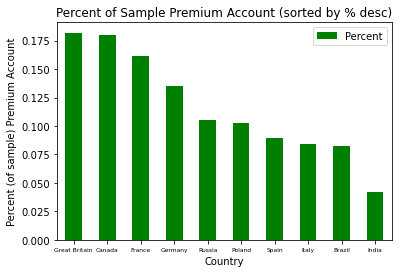

In [11]:
# display bar plot
ax = premium_percent_sample_sorted_df.plot.bar(x="Country", y="Percent", color="g", rot=90)
plt.xticks(rotation=0,fontsize=6)
plt.title("Percent of Sample Premium Account (sorted by % desc)")
plt.xlabel("Country")
plt.ylabel("Percent (of sample) Premium Account")
plt.savefig("figures/figure2_premium", dpi=300)

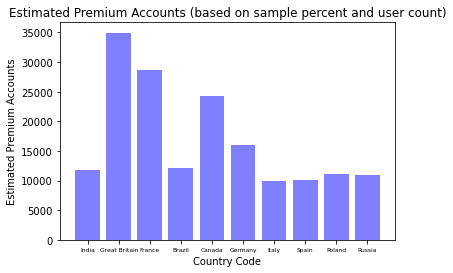

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(countries))

# Create the ticks for our bar chart's x axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries,rotation=0,fontsize=6)

percent_samples
est_population_premiums


plt.bar(x_axis,est_population_premiums, color='b', alpha=0.5, align='center')

# Give the chart a title, x label, and y label
plt.title("Estimated Premium Accounts (based on sample percent and user count)")
plt.xlabel("Country Code")
plt.ylabel("Estimated Premium Accounts")
plt.savefig("figures/figure3_premium", dpi=300)

In [13]:
estimated_premium_df = pd.DataFrame({"Country": countries,
                                    "Estimated Total Count of Premium Accounts": est_population_premiums
                                   })
estimated_premium_sorted_df = estimated_premium_df.sort_values(by=["Estimated Total Count of Premium Accounts"], axis=0, ascending=False,ignore_index=False)
estimated_premium_sorted_df

,Country,Estimated Total Count of Premium Accounts
1,Great Britain,34962.0
2,France,28590.0
4,Canada,24209.0
5,Germany,15954.0
3,Brazil,12106.0
0,India,11751.0
8,Poland,11125.0
9,Russia,10867.0
7,Spain,10082.0
6,Italy,9951.0


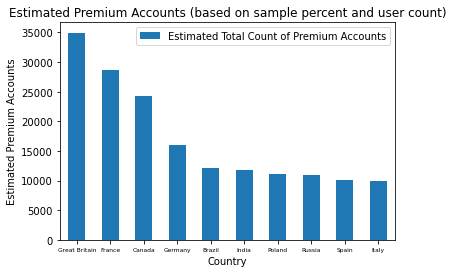

In [14]:
ax = estimated_premium_sorted_df.plot.bar()

countries_sorted1 = []
for country in estimated_premium_sorted_df["Country"]:
    countries_sorted1.append(country)
# add xticks labels
plt.xticks([0,1,2,3,4,5,6,7,8,9],countries_sorted1,fontsize=6,rotation=0)

# Give the chart a title, x label, and y label
plt.title("Estimated Premium Accounts (based on sample percent and user count)")
plt.xlabel("Country")
plt.ylabel("Estimated Premium Accounts")
plt.savefig("figures/figure4_premium", dpi=300)

In [15]:
estimated_premium_population_df = pd.DataFrame({"Country": countries,
                             "Total Player Count":count_populations,
                                    "Estimated Total Count of Premium Accounts": est_population_premiums
                                   })
estimated_premium_population_sorted_df = estimated_premium_population_df.sort_values(by=["Estimated Total Count of Premium Accounts"], axis=0, ascending=False,ignore_index=False)
estimated_premium_population_sorted_df

,Country,Total Player Count,Estimated Total Count of Premium Accounts
1,Great Britain,192118,34962.0
2,France,176560,28590.0
4,Canada,134687,24209.0
5,Germany,117887,15954.0
3,Brazil,147040,12106.0
0,India,276922,11751.0
8,Poland,108111,11125.0
9,Russia,103656,10867.0
7,Spain,112180,10082.0
6,Italy,117604,9951.0


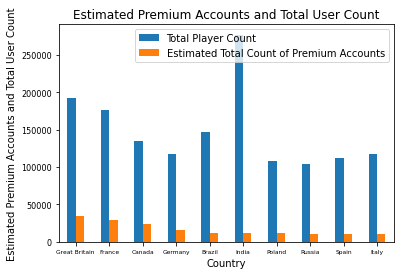

In [16]:
ax = estimated_premium_population_sorted_df.plot.bar()
countries_sorted2 = []
for country in estimated_premium_population_sorted_df["Country"]:
    countries_sorted2.append(country)
# add xticks labels
plt.xticks([0,1,2,3,4,5,6,7,8,9],countries_sorted2,fontsize=6,rotation=0)
plt.yticks(fontsize=8)    
# Give the chart a title, x label, and y label
plt.title("Estimated Premium Accounts and Total User Count")
plt.xlabel("Country")
plt.ylabel("Estimated Premium Accounts and Total User Count")
plt.savefig("figures/figure5_premium", dpi=300)